In [1]:
%load_ext autoreload
%autoreload 2

In [5]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [7]:
from classes.data.dataset import (
    get_raw_dataset,
    raw_to_processed_dataset,
    load_data,
    get_processed_dataset,
)
from classes.preprocessing import (
    spell_correction,
    normalize,
    delete_emoji,
    delete_unwanted_keys,
    preprocess_testdata,
)
from classes.utils import write_to_file, get_path
from classes.models import custom_gru, custom_gru_bi
from classes.visualisation import prediction_real_ratio,metrics


import matplotlib.pyplot as plt
import pandas as pd
import json
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.layers import Embedding, GRU, Dense, Dropout, Activation, Bidirectional, LSTM
from keras.models import Sequential, load_model
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Dropout, Activation, Flatten, Embedding, LSTM
from keras.optimizers import SGD

In [ ]:
(x_train, y_train), (x_test, y_test), input_dim = load_data(
    spell_correction_enabled=False
)

In [ ]:
hidden_units = 256
embedding_dim = 32
model = custom_gru_bi(hidden_units,input_dim,embedding_dim)
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model = load_model("sentiment_analysis.h5")

In [48]:
[test_loss, test_accuracy] = model.evaluate(x_test, y_test)

698/698 [==============================] - 3s 4ms/step


In [49]:
test_accuracy

0.9369627496916106

In [50]:
predictions = model.predict(x_test)

In [51]:
prediction_real_ratio(predictions,y_test)

              Positiv  Neutral  Negativ
Vorhersagen       247      371       80
Wirklichkeit      249      359       90


In [133]:
metrics(predictions,y_test)

Präzision: 	92.33%
Trefferquote: 	89.87%
F1-Maß: 	91.08
               Positiv Neutral Negativ
True Positive      237     347      70
False Negative      12      12      20
False Positive      10      24      10
Präzision       95.95%  93.53%  87.50%
Trefferquote    95.18%  96.66%  77.78%
F1-Maß           95.56   95.07   82.35


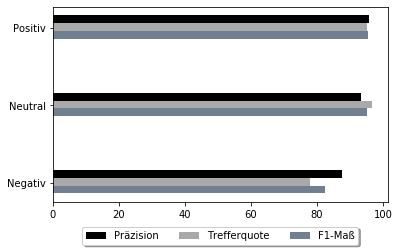

In [13]:
y = (87.50,93.53,95.95)
z = (77.78,96.66,95.18)
k = (82.35,95.07,95.56)

N = 3


ind = np.arange(N) 
width = 0.1 

ax = plt.subplot(111)

ax.barh(ind+ width+width, y, width, label='Präzision',color='k')
ax.barh(ind + width, z, width, label='Trefferquote',color='darkgray')
ax.barh(ind , k, width, label='F1-Maß',color='slategrey')



plt.yticks(ind + width-0.1 / 10, ('Negativ', 'Neutral', 'Positiv'))

box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=True, shadow=True, ncol=5)

fig = plt.gcf()
#fig.savefig('diagram.png', dpi=1000,forward=True)
plt.show()